In [1]:
# when installing nltk for the first time we need to also download a few built in libraries
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/leoasad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/leoasad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/leoasad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Import possitive tweets

In [2]:
import pandas as pd

data = pd.read_csv("../raw_data/tweets/training.processed.noemoticon.csv",
                  encoding_errors='ignore',
                  usecols=[0,5],
                  header=None,
                  names=['label','tweets'])
data = data.dropna()
data.head()

,label,tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [3]:
positive_tweets = data[data['label']==4].drop(columns='label').reset_index(drop=True)
positive_tweets['label'] = 0
positive_tweets.head()

,tweets,label
0,I LOVE @Health4UandPets u guys r the best!!,0
1,im meeting up with one of my besties tonight! ...,0
2,"@DaRealSunisaKim Thanks for the Twitter add, S...",0
3,Being sick can be really cheap when it hurts t...,0
4,@LovesBrooklyn2 he has that effect on everyone,0


In [4]:
positive_tweets.head()

,tweets,label
0,I LOVE @Health4UandPets u guys r the best!!,0
1,im meeting up with one of my besties tonight! ...,0
2,"@DaRealSunisaKim Thanks for the Twitter add, S...",0
3,Being sick can be really cheap when it hurts t...,0
4,@LovesBrooklyn2 he has that effect on everyone,0


# Import depressive tweets

In [5]:
depressive_tweets = pd.read_csv("../raw_data/tweets/depressive_tweets_processed.csv",
                                   sep = '|',
                                   header = None,
                                   usecols = [5],
                                   names=['tweets'])

depressive_tweets = depressive_tweets.dropna()
depressive_tweets['label'] = 1
depressive_tweets

,tweets,label
0,The lack of this understanding is a small but ...,1
1,i just told my parents about my depression and...,1
2,depression is something i don't speak about ev...,1
3,Made myself a tortilla filled with pb&j. My de...,1
4,@WorldofOutlaws I am gonna need depression med...,1
...,...,...
2340,Many sufferers of depression aren't sad; they ...,1
2341,No Depression by G Herbo is my mood from now o...,1
2342,What do you do when depression succumbs the br...,1
2343,Ketamine Nasal Spray Shows Promise Against Dep...,1


# Concat possitive + depressive tweets

## Undersampling of the possitives tweets to balance the dataset

In [6]:
n_depressive = len(depressive_tweets)

positive_tweets = positive_tweets.sample(n=n_depressive)

## Concat both datasets + shuffle their rows

In [7]:
tweets = pd.concat([positive_tweets, depressive_tweets]).sample(frac=1).reset_index(drop=True)
tweets

,tweets,label
0,Clinical depression is the # 1 global leading ...,1
1,@SamiHernandez5 honey i told you that you can'...,1
2,@skandarkeynes hei. i very like you. you're v...,0
3,In Ze Car With Katie And Heather On Our Way To...,0
4,@celinieee I'm sure you'll get one soon. Anyw...,0
...,...,...
4621,@ItsPresmatic @AboksSignature We come to twitt...,1
4622,@robinsvegas are you building up your toleranc...,0
4623,did some small tweaks I think it sounds good,0
4624,Preparing for a week full of business,0


## Preprocessing

### Lowercase 

In [8]:
def to_lower(text):
    return text.lower()

### Expand contractions

In [9]:
contractions = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

In [10]:
contractions = dict((k.lower(), v.lower()) for k,v in contractions.items())

In [11]:
import re

c_re = re.compile('(%s)' % '|'.join(contractions.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return contractions[match.group(0)]
    return c_re.sub(replace, text)

### Remove bad symbols

In [12]:
bad_symbols = re.compile('[^0-9a-z #+_]')

def remove_bad_symbols(text, bad_symbols=bad_symbols):
    return bad_symbols.sub(' ', text)

### Remove punctuation

In [13]:
import string

string.punctuation

def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')  
    return text

### Remove numbers

In [14]:
def remove_numbers(text):
    return ''.join(word for word in text if not word.isdigit())

### Remove stop words

In [15]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words1 = set(stopwords.words('english'))
stop_words2 = ['http','etc','com','twitter']

def remove_stopwords(text):
    
    word_tokens = text.split()
    
    text = [w for w in word_tokens if not w in stop_words1]
    for stop_word in stop_words2:
        text = [w.replace(stop_word,'') for w in text]
    
    return ' '.join(text)

### Lemmatize

In [16]:
from nltk.stem import WordNetLemmatizer

def lemma(text):
    lemmatizer = WordNetLemmatizer()
    
    word_tokens = word_tokenize(text)
    
    lemmatized = [lemmatizer.lemmatize(word) for word in word_tokens]
    
    return ' '.join(lemmatized)

### Port Steemer

In [17]:
from nltk.stem.porter import PorterStemmer

def stem(text):
    stemmer = PorterStemmer()
    
    word_tokens = word_tokenize(text)
    
    stemmed = [stemmer.stem(word) for word in word_tokens]
    
    return ' '.join(stemmed)

In [18]:
tweets.loc[:,'clean_tweets'] = tweets['tweets'].apply(
                                        to_lower).apply(
                                        expandContractions).apply(
                                        remove_bad_symbols).apply(
                                        remove_punctuation).apply(
                                        remove_numbers).apply(
                                        remove_stopwords).apply(
                                        lemma).apply(
                                        stem)

# Word Cloud

In [19]:
tweets = tweets[['clean_tweets','label']]

In [20]:
!pip install wordcloud
from wordcloud import WordCloud

In [21]:
depressive_words = tweets[tweets['label']==1]
depressive_words = ' '.join(list(map(str, depressive_words['clean_tweets'])))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)


not_depressive_words = tweets[tweets['label']==0]
not_depressive_words = ' '.join(list(map(str, not_depressive_words['clean_tweets'])))
not_depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(not_depressive_words)

## Depressive Words

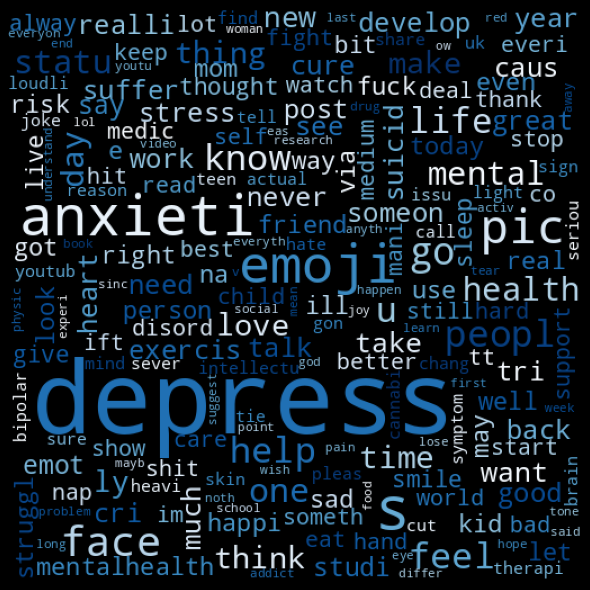

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

## Not Depressive words

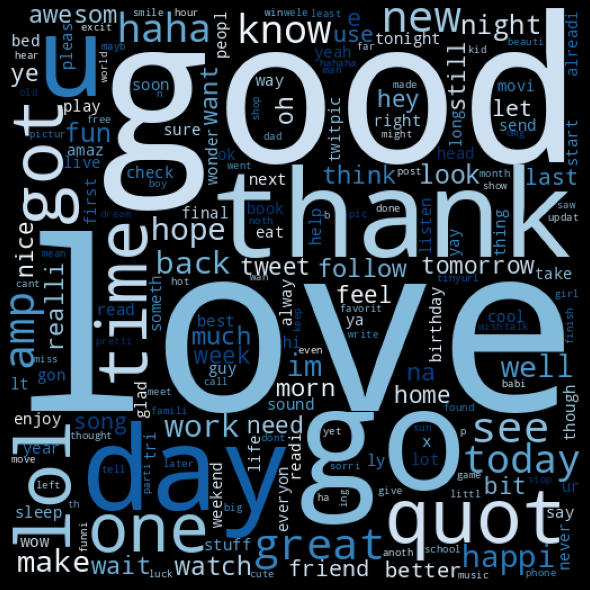

In [23]:
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(not_depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

# Create a csv with cleaned data

In [24]:
tweets.to_csv('../../../leonardo-asad/MHFA/raw_data/tweets_cleaned')

In [25]:
tweets

,clean_tweets,label
0,clinic depress global lead caus disabl,1
1,samihernandez honey told can not listen song o...,1
2,skandarkeyn hei like cool act narnia awesom pl...,0
3,ze car kati heather way promm,0
4,celiniee sure get one soon anyway download fon...,0
...,...,...
4621,itspresmat abokssignatur e chill read depress ...,1
4622,robinsvega build toler blue oct show gon na need,0
4623,small tweak think sound good,0
4624,prepar week full busi,0


In [26]:
tweets.isnull().sum()

clean_tweets    0
label           0
dtype: int64

In [33]:
contain_http = pd.Series(["http" in tweet for tweet in tweets['clean_tweets']])

tweets[contain_http]

,clean_tweets,label


In [34]:
tweets

,clean_tweets,label
0,clinic depress global lead caus disabl,1
1,samihernandez honey told can not listen song o...,1
2,skandarkeyn hei like cool act narnia awesom pl...,0
3,ze car kati heather way promm,0
4,celiniee sure get one soon anyway download fon...,0
...,...,...
4621,itspresmat abokssignatur e chill read depress ...,1
4622,robinsvega build toler blue oct show gon na need,0
4623,small tweak think sound good,0
4624,prepar week full busi,0
